In [16]:
# libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [29]:
# read images
Red = cv2.imread('images/Red.jpg',0)
Green = cv2.imread('images/Green.jpg',0)
Blue = cv2.imread('images/Blue.jpg',0)
Near = cv2.imread('images/Near.jpg',0)
Middle = cv2.imread('images/Middle.jpg',0)
Thermal = cv2.imread('images/thermal.jpg',0)

In [30]:
# compress images
img_compressed = (np.dstack((Red, Green, Blue, Near, Middle, Thermal))).astype(np.uint8)
img_compressed_orginal = img_compressed.copy()

In [31]:
# reshape images (convert 3D array to 2D array)
img_compressed = img_compressed.reshape((774*773,6))

In [40]:
# get all Eigenvalues from a pca
pca = PCA(n_components = 6)
pca.fit_transform(img_compressed)

Eigenvalues = pca.explained_variance_

print(Eigenvalues)


[5528.4387433  1079.53432092   48.20155499   24.62477377   15.00501052
    6.87766381]


In [41]:
# create PCA, apply transforms, invert transforms
pca = PCA(n_components = 3)

compressed_transformed = pca.fit_transform(img_compressed)

compressed_invert = pca.inverse_transform(compressed_transformed)

In [42]:
# reshape images (convert 2D array to 3D array)
compressed_invert = compressed_invert.reshape((774,773,6))

In [43]:
# split images 
R,G,B,N,M,T = cv2.split(compressed_invert) 

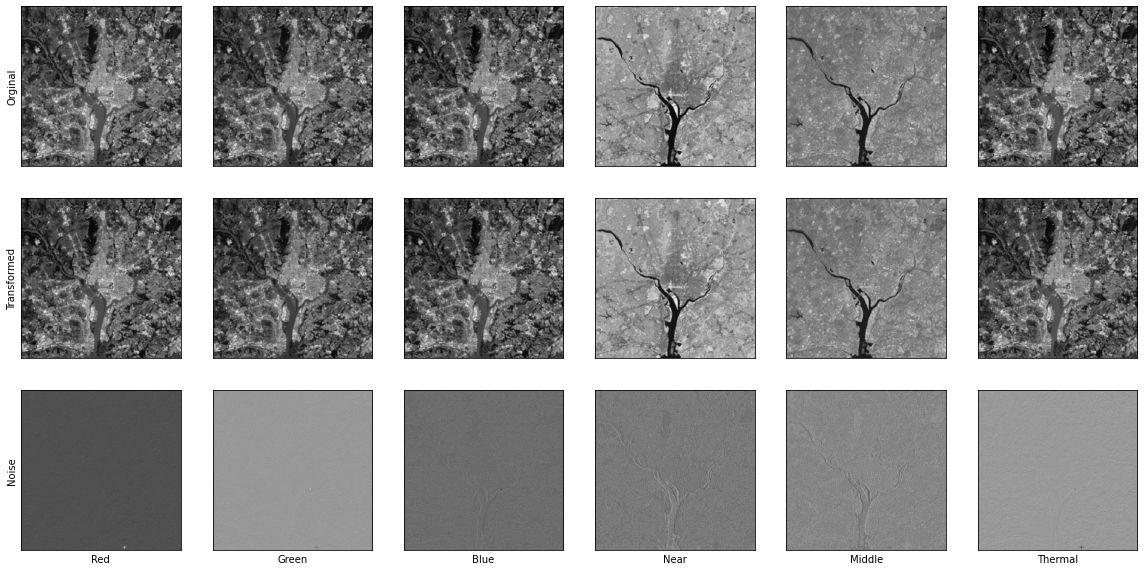

In [44]:
# plot results
fig, axs = plt.subplots(3, 6, figsize = (20,10))

# remove the x and y ticks
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

axs[0, 0].imshow(Red, cmap = 'gray')
axs[0, 1].imshow(Green, cmap = 'gray')
axs[0, 2].imshow(Blue, cmap = 'gray')
axs[0, 3].imshow(Near, cmap = 'gray')
axs[0, 4].imshow(Middle, cmap = 'gray')
axs[0, 5].imshow(Thermal, cmap = 'gray')

axs[1, 0].imshow(R, cmap = 'gray')
axs[1, 1].imshow(G, cmap = 'gray')
axs[1, 2].imshow(B, cmap = 'gray')
axs[1, 3].imshow(N, cmap = 'gray')
axs[1, 4].imshow(M, cmap = 'gray')
axs[1, 5].imshow(T, cmap = 'gray')

axs[2, 0].imshow(Red - R, cmap = 'gray')
axs[2, 1].imshow(Green - G, cmap = 'gray')
axs[2, 2].imshow(Blue - B, cmap = 'gray')
axs[2, 3].imshow(Near - N, cmap = 'gray')
axs[2, 4].imshow(Middle - M, cmap = 'gray')
axs[2, 5].imshow(Thermal - T, cmap = 'gray')

y1 = axs.flat[0]
y1.set(ylabel='Orginal');

y2 = axs.flat[6]
y2.set(ylabel='Transformed');

y3 = axs.flat[12]
y3.set(ylabel='Noise' , xlabel='Red');

x2 = axs.flat[13]
x2.set(xlabel='Green');

x3 = axs.flat[14]
x3.set(xlabel='Blue');

x4 = axs.flat[15]
x4.set(xlabel='Near');

x5 = axs.flat[16]
x5.set(xlabel='Middle');

x6 = axs.flat[17]
x6.set(xlabel='Thermal');

In [45]:
components = pca.components_

for row in components:
    print(row)

[ 0.49562519  0.47668624  0.4909174  -0.13700749  0.15238465  0.49409906]
[-0.00507487 -0.07471375 -0.00415145 -0.81660434 -0.57145841  0.03110479]
[-0.27227756 -0.11104941  0.84152949 -0.00200752 -0.01096658 -0.45303067]


In [46]:
pca.explained_variance_

array([5528.4387433 , 1079.53432092,   48.20155499])

In [47]:
pca.explained_variance_ratio_

array([0.82480993, 0.16106005, 0.00719138])

In [48]:
Covariace_mat = pca.get_covariance()

for row in Covariace_mat:
    for col in row: 
        print("%.2f" % col , end='\t\t')
    print()

1372.18		1303.87		1333.89		-369.93		419.55		1353.92		
1303.87		1274.55		1287.38		-295.12		445.93		1297.64		
1333.89		1287.38		1367.29		-367.24		414.64		1324.62		
-369.93		-295.12		-367.24		828.53		381.44		-400.20		
419.55		445.93		414.64		381.44		491.00		396.34		
1353.92		1297.64		1324.62		-400.20		396.34		1369.14		


In [51]:
# mse 
R_mse = ((Red - R)**2).mean()
G_mse = ((Green -G)**2).mean()
B_mse = ((Blue - B)**2).mean()
N_mse = ((Near - N)**2).mean()
M_mse = ((Middle - M)**2).mean()
T_mse = ((Thermal - T)**2).mean()

whole_MSE = ((img_compressed_orginal - compressed_invert)**2).mean()

print(f"Red picture MSE: {R_mse}")
print(f"Green picture MSE: {G_mse}")
print(f"Blue picture MSE: {B_mse}")
print(f"Near picture MSE: {N_mse}")
print(f"Middle picture MSE: {M_mse}")
print(f"Thermal picture MSE: {T_mse}")
print(f"Whole picture MSE: {whole_MSE}")
print('\n\n')
print(f"Total MSE Error: {R_mse + G_mse + B_mse + N_mse + M_mse + T_mse}")
print(f"sum of eigenvalues which wasn't use: {Eigenvalues[3:].sum()}")

Red picture MSE: 7.137310781434447
Green picture MSE: 7.875962353445088
Blue picture MSE: 0.7450398078586573
Near picture MSE: 7.198176113747016
Middle picture MSE: 15.247616624785454
Thermal picture MSE: 8.303264680437156
Whole picture MSE: 7.751228393617971



Total MSE Error: 46.507370361707814
sum of eigenvalues which wasn't use: 46.50744809410396
